In [1]:
#Memanggil modul untuk visualisasi dan dataframe
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px, matplotlib.pyplot as plt,plotly.graph_objects as go, math

#Memanggil modul untuk praproses data
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency, chi2
from scipy import stats
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

#Memanggil modul untuk pemodelan
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import statsmodels.api as sm

#Memanggil modul untuk hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Memanggil modul untuk evaluasi
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve

# Praproses Data

In [2]:
df = pd.read_excel('C:/Users/agivc/Documents/Serba Serbi KULIAH/SKRIPSI JAYA JAYA JAYA/Data_Cagiva Chaedar Bey Lirna/data_employee.xlsx')
df

,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Thn_Posisi,Lama_Bekerja,Pendidikan Terakhir,Status Pernikahan,Posisi_Kerja,Status
0,3.0,11875000,1.700000e+06,2023,5,S1,K0,.Net Developer,0
1,15.0,9000000,1.200000e+06,2023,2,S1,TK0,Software Quality Assurance,0
2,17.0,8000000,1.200000e+06,2023,2,S1,TK0,Software Quality Assurance,0
3,8.0,8000000,2.200000e+06,2023,2,S1,TK0,Software Quality Assurance,0
4,35.0,11500000,1.200000e+06,2023,2,S1,TK0,.Net Developer,0
...,...,...,...,...,...,...,...,...,...
397,33.0,3100000,1.291667e+06,2019,2,S1,TK0,Digital Business Development,1
398,22.9,3000000,1.291667e+06,2019,2,S1,K1,Digital Marketing,1
399,46.0,2600000,1.339130e+06,2020,2,D3,TK0,Techincal Support,1
400,39.1,2550000,1.350000e+06,2018,1,S1,K2,IT Support,1


In [3]:
dummy_df = pd.get_dummies(df, drop_first=True)
dummy_df

,Jarak_Rumah(Km),Gaji(Rp),Tunjangan(Rp),Thn_Posisi,Lama_Bekerja,Status,Pendidikan Terakhir_D4,Pendidikan Terakhir_S1,Pendidikan Terakhir_S2,Pendidikan Terakhir_SMA,...,Posisi_Kerja_Techincal Support,Posisi_Kerja_Technical Writer,Posisi_Kerja_Technical Analyst,Posisi_Kerja_Technical Project Support,Posisi_Kerja_Technical Support,Posisi_Kerja_Technical Writer,Posisi_Kerja_UAT Tester,Posisi_Kerja_UI/UX Designer,Posisi_Kerja_VB6 Developer,Posisi_Kerja_lT Technical Head.
0,3.0,11875000,1.700000e+06,2023,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,9000000,1.200000e+06,2023,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17.0,8000000,1.200000e+06,2023,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,8000000,2.200000e+06,2023,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,11500000,1.200000e+06,2023,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,33.0,3100000,1.291667e+06,2019,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
398,22.9,3000000,1.291667e+06,2019,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
399,46.0,2600000,1.339130e+06,2020,2,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
400,39.1,2550000,1.350000e+06,2018,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Membuat objek RobustScaler
scaler = RobustScaler()

columns_to_scale = ['Jarak_Rumah(Km)', 'Gaji(Rp)', 'Tunjangan(Rp)', 'Thn_Posisi', 'Lama_Bekerja']


scaled_data = scaler.fit_transform(df[columns_to_scale])

dummy_df[columns_to_scale] = scaled_data

In [5]:
X = dummy_df.drop(columns=['Status'])  
y = df['Status']

In [6]:
# Langkah 1: Bagi data menjadi 70% data latih dan 30% data sisa (validasi + test)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=35)

# Langkah 2: Bagi data sisa menjadi 50% validasi dan 50% test
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=35)

In [7]:
print(len(X_train))
print(len(X_valid))
print(len(X_test))

281
60
61


In [8]:
print(len(y_train))
print(len(y_valid))
print(len(y_test))

281
60
61


# Pemodelan Soft Voting Classifier

## Pemodelan SVM

In [10]:
# Inisialisasi model SVM
svm_model = SVC(probability=True, kernel='rbf', random_state=35)


# Pelatihan model SVM
svm_model.fit(X_train, y_train)

print(svm_model.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 35, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [11]:
# Mendapatkan koefisien dual dari model
dual_coefficients = svm_model.dual_coef_

# Mendapatkan vektor fitur dari model
support_vectors = svm_model.support_vectors_

# Mendapatkan nilai b (intersep atau bias) dari model
intercept_svm = svm_model.intercept_

# Jika dual coefficients dalam bentuk baris, ubah menjadi kolom
if dual_coefficients.shape[0] == 1:
    dual_coefficients = dual_coefficients.T

# Pastikan kedua dimensi sesuai sebelum melakukan perkalian
if dual_coefficients.shape[0] != support_vectors.shape[0]:
    raise ValueError("Dimensi dual coefficients dan support vectors tidak cocok")

# Hitung nilai w
w = np.sum(dual_coefficients * support_vectors, axis=0)

# print("dual coefficients:", dual_coefficients)
print("Nilai w:", w)
print("Vektor fitur x:", support_vectors)
print("Nilai b (intersep):", intercept_svm)

Nilai w: [  2.98090659  -3.08803988  -7.33389059 -18.55050974 -11.15152004
  -1.72523284  -5.84097706   1.78503445   0.70446396   1.56447945
   1.09241836   1.33579588  -0.12391455   1.5483606   -1.36819908
  -0.15283736  -0.21496555   0.          -1.00074163   1.
   0.09241836   0.           0.           0.          -1.
  -1.           2.           0.26640405   0.           2.73008419
  -1.           0.           0.           1.           0.
   1.          -2.67801924   0.          -1.          -0.6498694
  -1.           0.           0.          -1.           1.
  -1.           0.          -1.           0.55703736   0.
   0.           0.           0.           0.           0.
   0.          -2.           0.          -1.           0.9787061
   1.           0.           0.           0.          -0.8883582
  -1.           0.16771575   2.           1.71539157   1.
   0.           1.           1.           1.           0.
   1.           0.32765192   1.          -0.21496555  -1.
   0.     

In [12]:
print(len(support_vectors))


161


In [13]:
print("Vektor fitur x:", support_vectors)


Vektor fitur x: [[-0.55555556  0.22857143 10.90909091 ...  0.          0.
   0.        ]
 [-0.44444444  0.08571429  0.         ...  0.          0.
   0.        ]
 [-0.72222222  0.01428571  0.         ...  0.          0.
   0.        ]
 ...
 [-0.44444444 -1.11428571  0.         ...  0.          0.
   0.        ]
 [ 0.61111111  0.05714286  1.51778656 ...  0.          0.
   0.        ]
 [-0.16666667  0.97142857  0.72332016 ...  0.          0.
   0.        ]]


## Evaluasi SVM

In [14]:
def predict_svm_with_w_b(X_test, w, intercept):
    decision_values = np.dot(X_test, w) + intercept
    predictions = np.where(decision_values > 0, 1, 0)  # menggunakan ambang 0
    return predictions

# Prediksi menggunakan nilai 𝑤 . 𝑥 + 𝑏
y_pred_manual = predict_svm_with_w_b(X_test, w, intercept_svm)
# Mendapatkan probabilitas kelas untuk data uji
probabilities_svm = svm_model.predict_proba(X_test)

# Buat kolom baru 'Keterangan' berdasarkan kesesuaian prediksi dan data aktual
keterangan_svm = np.where(y_pred_manual == y_test, 'Prediksi Benar', 'Prediksi Salah')

In [15]:
df_result_svm = pd.DataFrame({
    'Probabilitas Kelas Aktif': probabilities_svm[:, 0],
    'Probabilitas Kelas Atrisi': probabilities_svm[:, 1],
    'Prediksi': y_pred_manual,
    'Data Aktual': y_test,
    'Keterangan': keterangan_svm
})

# Menambahkan judul untuk index
df_result_svm.index.name = 'No. Baris Data'

df_result_svm.head(10)

,Probabilitas Kelas Aktif,Probabilitas Kelas Atrisi,Prediksi,Data Aktual,Keterangan
No. Baris Data,,,,,
233,0.000002,0.999998,0,1,Prediksi Salah
269,0.002923,0.997077,0,1,Prediksi Salah
31,0.858104,0.141896,0,0,Prediksi Benar
106,0.969994,0.030006,0,0,Prediksi Benar
220,0.055168,0.944832,0,1,Prediksi Salah
297,0.036644,0.963356,1,1,Prediksi Benar
56,0.946527,0.053473,0,0,Prediksi Benar
36,0.942919,0.057081,0,0,Prediksi Benar
92,0.943080,0.056920,0,0,Prediksi Benar


In [16]:
# Hitung jumlah prediksi benar dan salah
prediksi_benar_svm = (df_result_svm['Keterangan'] == 'Prediksi Benar').sum()
prediksi_salah_svm = (df_result_svm['Keterangan'] == 'Prediksi Salah').sum()

# Tampilkan hasil
print("Jumlah prediksi benar:", prediksi_benar_svm)
print("Jumlah prediksi salah:", prediksi_salah_svm)


Jumlah prediksi benar: 35
Jumlah prediksi salah: 26


In [17]:
# Prediksi kelas untuk data latih
y_train_pred_svm = svm_model.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

# Prediksi kelas untuk data validasi
y_val_pred_svm = svm_model.predict(X_valid)
val_accuracy_svm = accuracy_score(y_valid, y_val_pred_svm)

# Prediksi kelas untuk data uji
y_test_pred_svm = svm_model.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

# Cetak hasil akurasi
print("Akurasi untuk data latih:", train_accuracy_svm)
print("Akurasi untuk data validasi:", val_accuracy_svm)
print("Akurasi untuk data uji:", test_accuracy_svm)


Akurasi untuk data latih: 0.9679715302491103
Akurasi untuk data validasi: 0.9666666666666667
Akurasi untuk data uji: 0.9672131147540983


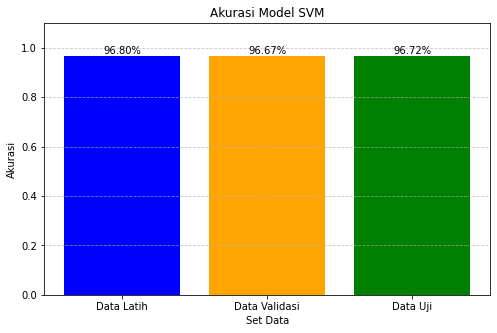

In [18]:
# Daftar nama set data
datasets = ['Data Latih', 'Data Validasi', 'Data Uji']

# Daftar nilai akurasi
accuracies = [train_accuracy_svm, val_accuracy_svm, test_accuracy_svm]

# Buat bar plot
plt.figure(figsize=(8, 5))
plt.bar(datasets, accuracies, color=['blue', 'orange', 'green'])
plt.title('Akurasi Model SVM')
plt.xlabel('Set Data')
plt.ylabel('Akurasi')
plt.ylim(0, 1.1)  # Rentang sumbu y dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label persentase di atas setiap bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2%}', ha='center', va='bottom')

plt.show()


## Pemodelan Decision Tree

In [19]:
# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', random_state=35)


# Pelatihan model Decision Tree
dt_model.fit(X_train, y_train)

print(dt_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 35, 'splitter': 'best'}


In [20]:
# Akses struktur pohon internal
tree = dt_model.tree_

# Dapatkan nilai Gini dari setiap node
gini_values = tree.impurity

# Dapatkan jumlah sampel di setiap node
node_samples = tree.n_node_samples

# Dapatkan jumlah sampel dari masing-masing kelas di setiap node
node_values = tree.value

print("Informasi dari beberapa node pertama:")
for i in range(min(10, len(gini_values))):
    print(f"Node {i}: Gini = {gini_values[i]:.4f}, Sampel = {node_samples[i]}, Nilai = {node_values[i]}")


Informasi dari beberapa node pertama:
Node 0: Gini = 0.4699, Sampel = 281, Nilai = [[106. 175.]]
Node 1: Gini = 0.2396, Sampel = 194, Nilai = [[ 27. 167.]]
Node 2: Gini = 0.1066, Sampel = 177, Nilai = [[ 10. 167.]]
Node 3: Gini = 0.0670, Sampel = 173, Nilai = [[  6. 167.]]
Node 4: Gini = 0.0357, Sampel = 165, Nilai = [[  3. 162.]]
Node 5: Gini = 0.0000, Sampel = 1, Nilai = [[1. 0.]]
Node 6: Gini = 0.0241, Sampel = 164, Nilai = [[  2. 162.]]
Node 7: Gini = 0.0123, Sampel = 162, Nilai = [[  1. 161.]]
Node 8: Gini = 0.0000, Sampel = 159, Nilai = [[  0. 159.]]
Node 9: Gini = 0.4444, Sampel = 3, Nilai = [[1. 2.]]


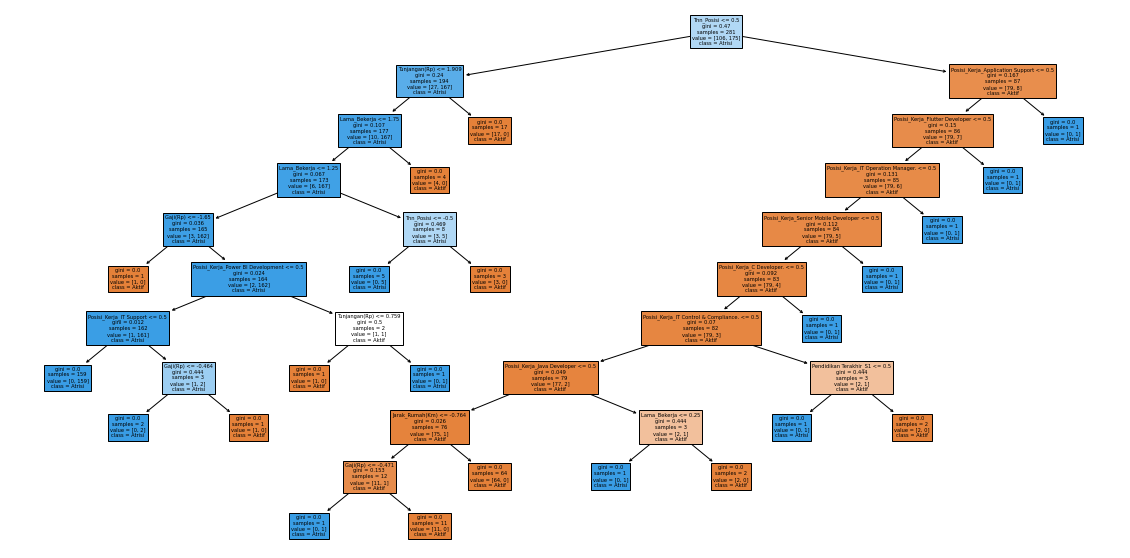

|--- Thn_Posisi <= 0.50
|   |--- Tunjangan(Rp) <= 1.91
|   |   |--- Lama_Bekerja <= 1.75
|   |   |   |--- Lama_Bekerja <= 1.25
|   |   |   |   |--- Gaji(Rp) <= -1.65
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- Gaji(Rp) >  -1.65
|   |   |   |   |   |--- Posisi_Kerja_Power BI Development <= 0.50
|   |   |   |   |   |   |--- Posisi_Kerja_IT Support <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 159.00] class: 1
|   |   |   |   |   |   |--- Posisi_Kerja_IT Support >  0.50
|   |   |   |   |   |   |   |--- Gaji(Rp) <= -0.46
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Gaji(Rp) >  -0.46
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |--- Posisi_Kerja_Power BI Development >  0.50
|   |   |   |   |   |   |--- Tunjangan(Rp) <= 0.76
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- Tunjangan(Rp) >  0.76
|   |   |   |

In [21]:
# Plot pohon keputusan
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=['Aktif', 'Atrisi'])
plt.show()

# Export pohon keputusan dalam bentuk teks
tree_text = export_text(dt_model, feature_names=list(X_train.columns), show_weights=True)
print(tree_text)

## Evaluasi Model Decision Tree

In [22]:
probabilities_dt = dt_model.predict_proba(X_test)

# Lakukan prediksi pada data uji
y_pred_dt = dt_model.predict(X_test)

# Pelatihan decision tree
keterangan_dt = np.where(y_pred_dt == y_test, 'Prediksi Benar', 'Prediksi Salah')



In [23]:
df_result_dt = pd.DataFrame({
    'Probabilitas Kelas Aktif (0)': probabilities_dt[:, 0],
    'Probabilitas Kelas Atrisi (1)': probabilities_dt[:, 1],
    'Prediksi': y_pred_dt,
    'Data Aktual': y_test,
    'Keterangan': keterangan_dt
})

# Menambahkan judul untuk index
df_result_dt.index.name = 'No. Baris Data'

df_result_dt.head(10)

,Probabilitas Kelas Aktif (0),Probabilitas Kelas Atrisi (1),Prediksi,Data Aktual,Keterangan
No. Baris Data,,,,,
233,0.0,1.0,1,1,Prediksi Benar
269,0.0,1.0,1,1,Prediksi Benar
31,1.0,0.0,0,0,Prediksi Benar
106,1.0,0.0,0,0,Prediksi Benar
220,0.0,1.0,1,1,Prediksi Benar
297,0.0,1.0,1,1,Prediksi Benar
56,1.0,0.0,0,0,Prediksi Benar
36,1.0,0.0,0,0,Prediksi Benar
92,1.0,0.0,0,0,Prediksi Benar


In [24]:
# Hitung jumlah prediksi benar dan salah
prediksi_benar_dt = (df_result_dt['Keterangan'] == 'Prediksi Benar').sum()
prediksi_salah_dt = (df_result_dt['Keterangan'] == 'Prediksi Salah').sum()

# Tampilkan hasil
print("Jumlah prediksi benar:", prediksi_benar_dt)
print("Jumlah prediksi salah:", prediksi_salah_dt)


Jumlah prediksi benar: 60
Jumlah prediksi salah: 1


In [25]:
# Prediksi kelas untuk data latih
y_train_pred_dt = dt_model.predict(X_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)

# Prediksi kelas untuk data validasi
y_val_pred_dt = dt_model.predict(X_valid)
val_accuracy_dt = accuracy_score(y_valid, y_val_pred_dt)

# Prediksi kelas untuk data uji
y_test_pred_dt = dt_model.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

# Cetak hasil akurasi
print("Akurasi untuk data latih:", train_accuracy_dt)
print("Akurasi untuk data validasi:", val_accuracy_dt)
print("Akurasi untuk data uji:", test_accuracy_dt)


Akurasi untuk data latih: 1.0
Akurasi untuk data validasi: 0.9166666666666666
Akurasi untuk data uji: 0.9836065573770492


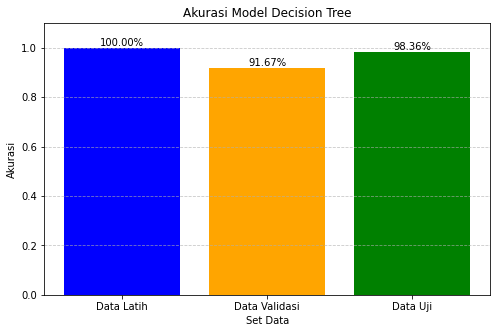

In [26]:
# Daftar nama set data
datasets = ['Data Latih', 'Data Validasi', 'Data Uji']

# Daftar nilai akurasi
accuracies = [train_accuracy_dt, val_accuracy_dt, test_accuracy_dt]

# Buat bar plot
plt.figure(figsize=(8, 5))
plt.bar(datasets, accuracies, color=['blue', 'orange', 'green'])
plt.title('Akurasi Model Decision Tree')
plt.xlabel('Set Data')
plt.ylabel('Akurasi')
plt.ylim(0, 1.1)  # Rentang sumbu y dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label persentase di atas setiap bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2%}', ha='center', va='bottom')

plt.show()


## Pemodelan Regresi Logistik Biner

### Uji Likelihood Ratio

In [27]:
def likelihood_ratio_test(X_train, y_train, random_state=35):
    # Melatih model penuh
    full_model = LogisticRegression(random_state=random_state)
    full_model.fit(X_train, y_train)
    
    # Melatih model null (tanpa prediktor)
    null_model = LogisticRegression(random_state=random_state, fit_intercept=False)
    null_model.fit(np.zeros((X_train.shape[0], 1)), y_train)
    
    # Log-likelihood untuk model penuh dan model null
    ll_full = full_model.score(X_train, y_train)
    ll_null = null_model.score(np.zeros((X_train.shape[0], 1)), y_train)
    
    # Menghitung statistik uji Likelihood Ratio
    lr_stat = 2 * (ll_full - ll_null) * len(y_train)
    df = len(full_model.coef_[0])
    lr_p_value = chi2.sf(lr_stat, df=df)
    
    # Hitung nilai kritis chi-square
    chi2_critical = chi2.ppf(0.95, df)
    
    # Interpretasi hasil
    if lr_stat > chi2_critical and lr_p_value < 0.05:
        conclusion = "Menolak H0 (Terdapat pengaruh signifikan antara prediktor dan respon)"
    else:
        conclusion = "Gagal menolak H0 (Tidak terdapat pengaruh signifikan antara prediktor dan respon)"
    
    # Mengembalikan hasil dalam bentuk dataframe
    return create_result_df('Likelihood Ratio', lr_stat, df, chi2_critical, lr_p_value, conclusion)

### Uji Hosmer-Lemeshow

In [28]:
def hosmer_lemeshow_test(X_test, y_test, model, g=10):
    # Prediksi probabilitas
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Buat data frame untuk menyimpan hasil prediksi dan aktual
    data = pd.DataFrame({'true': y_test, 'pred': y_test_proba})
    
    # Mengelompokkan data berdasarkan desil prediksi
    data['decile'] = pd.qcut(data['pred'], g, duplicates='drop')
    
    # Menghitung jumlah observasi dan ekspektasi dalam setiap desil
    observed = data.groupby('decile')['true'].sum()
    expected = data.groupby('decile')['pred'].sum()
    total = data.groupby('decile')['true'].count()
    
    # Menghitung statistik uji Hosmer-Lemeshow
    hl_test_stat = (((observed - expected) ** 2) / (expected * (1 - expected / total))).sum()
    p_value = chi2.sf(hl_test_stat, g - 2)
    
    # Hitung nilai kritis chi-square
    chi2_critical = chi2.ppf(0.95, g - 2)
    
    # Interpretasi hasil
    if p_value > 0.05:
        conclusion = "Gagal menolak H0 (Model sesuai dengan data)"
    else:
        conclusion = "Menolak H0 (Model tidak sesuai dengan data)"
    
    # Mengembalikan hasil dalam bentuk dataframe
    return create_result_df('Hosmer-Lemeshow', hl_test_stat, g - 2, chi2_critical, p_value, conclusion)

In [29]:
def create_result_df(test_name, test_stat, df, chi2_critical, p_value, conclusion):
    # Buat dataframe hasil
    result_df = pd.DataFrame({
        'Uji': [test_name],
        'Statistik Uji': [test_stat],
        'df': [df],
        'Chi-square': [chi2_critical],
        'p-value': [p_value],
        'Keterangan': [conclusion]
    })
    return result_df

### Model Regresi Logistik Biner

In [30]:
# Inisialisasi Regresi Logistik Biner
lr_model = LogisticRegression(random_state=35)
# Pelatihan model Regresi Logistik Biner
lr_model.fit(X_train, y_train)

print(lr_model.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 35, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [31]:
# Melakukan uji Likelihood Ratio
hasil_uji_lr = likelihood_ratio_test(X_train, y_train)
hasil_uji_lr

,Uji,Statistik Uji,df,Chi-square,p-value,Keterangan
0,Likelihood Ratio,324.0,139,167.514305,8.287195e-17,Menolak H0 (Terdapat pengaruh signifikan antar...


In [32]:
# Melakukan uji Hosmer-Lemeshow
hasil_uji_hl = hosmer_lemeshow_test(X_test, y_test, lr_model)
hasil_uji_hl

,Uji,Statistik Uji,df,Chi-square,p-value,Keterangan
0,Hosmer-Lemeshow,12.132263,8,15.507313,0.145399,Gagal menolak H0 (Model sesuai dengan data)


In [33]:
# 1. Mendapatkan nilai estimasi parameter (intercept dan koefisien)
intercept_lr = lr_model.intercept_[0]
coefficients_lr = lr_model.coef_[0]

# 2. Menghitung nilai logit (z)
logit = intercept_lr + np.dot(X_test, coefficients_lr)

# 3. Menghitung probabilitas (sigmoid dari logit)
probabilities_lr = 1 / (1 + np.exp(-logit))


In [34]:
# Fungsi untuk menghitung standar error dari koefisien
def get_standard_errors(model, X):
    # Membuat prediksi
    predictions = model.predict_proba(X)[:, 1]
    
    # Menambahkan kolom konstanta (intercept)
    X_design = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # Menghitung matrix Fisher Information
    V = np.diag(predictions * (1 - predictions))
    fisher_information = np.dot(np.dot(X_design.T, V), X_design)
    
    # Invers dari matrix Fisher Information adalah covariate matrix
    cov_matrix = np.linalg.inv(fisher_information)
    
    # Standar error dari koefisien adalah akar dari diagonal matrix covariate
    standard_errors = np.sqrt(np.diag(cov_matrix))
    
    return standard_errors

# Mendapatkan standar error
standard_errors = get_standard_errors(lr_model, X)

# Menghitung statistik uji Wald dan p-value
intercept_standard_error = standard_errors[0]
coef_standard_errors = standard_errors[1:]
wald_stats = coefficients_lr / coef_standard_errors
p_values = 2 * (1 - stats.norm.cdf(np.abs(wald_stats)))

# Membuat tabel hasil
results = pd.DataFrame({
    'Feature': ['Intercept'] + [f'X{i+1}' for i in range(X.shape[1])],
    'Coefficient': [intercept_lr] + list(coefficients_lr),
    'Standard Error': [intercept_standard_error] + list(coef_standard_errors),
    'Wald Statistic': [intercept_lr / intercept_standard_error] + list(wald_stats),
    'P-value': [2 * (1 - stats.norm.cdf(np.abs(intercept_lr / intercept_standard_error)))] + list(p_values),
    'H0': ['Ditolak' if p < 0.05 else 'Diterima' for p in [2 * (1 - stats.norm.cdf(np.abs(intercept_lr / intercept_standard_error)))] + list(p_values)]
})

# Menampilkan tabel hasil
print(results)

       Feature  Coefficient  Standard Error  Wald Statistic       P-value  \
0    Intercept     3.871576        2.029985        1.907195  5.649539e-02   
1           X1     0.045832        0.315291        0.145365  8.844231e-01   
2           X2    -0.087337        0.341624       -0.255653  7.982192e-01   
3           X3    -0.457712        0.302923       -1.510987  1.307917e-01   
4           X4    -4.850374        0.855350       -5.670631  1.422727e-08   
..         ...          ...             ...             ...           ...   
135       X135    -0.122322        3.413821       -0.035831  9.714168e-01   
136       X136    -0.412639        1.748775       -0.235959  8.134645e-01   
137       X137     0.176035        2.469463        0.071285  9.431710e-01   
138       X138     0.000690        4.467928        0.000154  9.998768e-01   
139       X139     0.336808        2.932846        0.114840  9.085720e-01   

           H0  
0    Diterima  
1    Diterima  
2    Diterima  
3    Diteri

In [73]:
# Menampilkan variabel yang menolak H0
rejected_variables = results[results['H0'] == 'Ditolak']['Feature'].tolist()
print("\nVariabel yang menolak H0:")
print(rejected_variables)


Variabel yang menolak H0:
['X4', 'X5']


In [35]:
# # Uji Parsial (Wald Test)
# z_scores = coefficients_lr / np.sqrt(np.diag(np.linalg.inv(np.dot(X_train.T, X_train))))
# p_values = [stats.norm.sf(abs(x))*2 for x in z_scores]

In [36]:
# print("\nWald Test (Partial Test):")
# for feature, coef, z, p in zip(X.columns, coefficients_lr, z_scores, p_values):
#     print(f"{feature}: Coef={coef}, z-score={z}, p-value={p}")

In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for training data
vif_df = calculate_vif(X_train)
print(vif_df)


c:\Users\agivc\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\agivc\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                             feature       VIF
0                    Jarak_Rumah(Km)  2.973527
1                           Gaji(Rp)  8.693338
2                      Tunjangan(Rp)  3.084194
3                         Thn_Posisi  4.221265
4                       Lama_Bekerja  5.863112
..                               ...       ...
134    Posisi_Kerja_Technical Writer  1.233715
135          Posisi_Kerja_UAT Tester  2.191621
136      Posisi_Kerja_UI/UX Designer  2.076913
137       Posisi_Kerja_VB6 Developer  1.245082
138  Posisi_Kerja_lT Technical Head.  1.049371

[139 rows x 2 columns]


In [38]:
high_vif = vif_df[vif_df['VIF'] > 10]
print(high_vif)

                       feature        VIF
6       Pendidikan Terakhir_S1  15.269272
14       Status Pernikahan_TK0  20.076767
17       Status Pernikahan_TK3        inf
37  Posisi_Kerja_Data Analyst         inf


In [39]:
len(coefficients_lr)

139

In [40]:
print(f"Intercept (b0): {intercept_lr}")
for feature, coef in zip(X.columns, coefficients_lr):
    print(f"Koefisien untuk {feature}: {coef}")

Intercept (b0): 3.8715759081201715
Koefisien untuk Jarak_Rumah(Km): 0.04583206905186047
Koefisien untuk Gaji(Rp): -0.0873371408367401
Koefisien untuk Tunjangan(Rp): -0.4577121881117371
Koefisien untuk Thn_Posisi: -4.850373981073096
Koefisien untuk Lama_Bekerja: -2.8518164735326548
Koefisien untuk Pendidikan Terakhir_D4: -0.4908185215174904
Koefisien untuk Pendidikan Terakhir_S1: -0.9845357308900607
Koefisien untuk Pendidikan Terakhir_S2: 0.27557603852315565
Koefisien untuk Pendidikan Terakhir_SMA: 0.09130926270286632
Koefisien untuk Pendidikan Terakhir_SMK: 0.4653094891805206
Koefisien untuk Pendidikan Terakhir_Tidak Diketahui: 0.31252130962650937
Koefisien untuk Status Pernikahan_K1: -0.14680783821666668
Koefisien untuk Status Pernikahan_K2: 0.1391002258323614
Koefisien untuk Status Pernikahan_K3: 0.5921254604271916
Koefisien untuk Status Pernikahan_TK0: -0.15918547888272044
Koefisien untuk Status Pernikahan_TK1: -0.07820744725084453
Koefisien untuk Status Pernikahan_TK2: -0.213813492

In [41]:
print("\nNilai logit:")
print(logit)


Nilai logit:
[ 3.9388921   3.95854953 -1.98967988 -1.03423996  1.29271383  2.19433854
 -0.46970443 -2.09225467 -1.94594643 -0.49381411 -0.98229695 -3.37994175
 -2.50787179  1.41005012 -1.16146718  2.73033719  3.21632508 -2.31906248
  2.35459784 -4.67638139  1.42270051  2.66937878 -0.21024287  1.10041419
 -1.01076297 -0.52750422  3.46667862  0.650085   -1.93428418  0.43449334
  2.02400371  2.06656887  0.97595849  5.11459699 -1.99891513  1.03589132
 -0.90453146 -0.72360304  2.7485675  -0.93609303 -2.67769723  2.69316787
  2.92884358  1.31920401  2.51393915  3.64550081 -0.50848407 -3.19979077
  2.87651352 -0.77282197 -0.83021529 -1.93296788  1.52335585 -3.42554379
 -3.39359417 -0.54887536  6.06006999 -0.96594413  0.0572525   1.48296716
 -0.40887527]


In [42]:
print("Probabilitas:")
print(probabilities_lr)

Probabilitas:
[0.98090206 0.98126685 0.12029073 0.26226292 0.78460618 0.89973996
 0.3846862  0.10985191 0.12499603 0.37899547 0.27243626 0.03292825
 0.07530818 0.80377385 0.23840079 0.93879322 0.96144402 0.08955647
 0.91329899 0.00922673 0.80576142 0.93519539 0.44763204 0.7503377
 0.26683056 0.37109918 0.96972466 0.65702962 0.12627714 0.60694612
 0.88329437 0.88761114 0.72630556 0.99402749 0.11931687 0.73805646
 0.28812017 0.32660006 0.9398324  0.28169021 0.06430229 0.93662229
 0.949254   0.78904924 0.92511325 0.97455597 0.37554896 0.0391736
 0.94667313 0.31586897 0.30359955 0.12642244 0.82103211 0.03150663
 0.03249626 0.36612537 0.9976712  0.27568966 0.51430922 0.81502033
 0.39918184]


In [43]:
# menghitung nilai probabilitas
probabilities_lr_auto = lr_model.predict_proba(X_test)

# Lakukan prediksi pada data uji
y_pred_lr = lr_model.predict(X_test)

# Buat kolom baru 'Keterangan' berdasarkan kesesuaian prediksi dan data aktual
keterangan_lr = np.where(y_pred_lr == y_test, 'Prediksi Benar', 'Prediksi Salah')



### Evaluasi Regresi Logistik Biner 

In [44]:
df_result_lr = pd.DataFrame({
    'Probabilitas Kelas Aktif (0)': probabilities_lr_auto[:, 0],
    'Probabilitas Kelas Atrisi (1)': probabilities_lr_auto[:, 1],
    'Prediksi': y_pred_lr,
    'Data Aktual': y_test,
    'Keterangan': keterangan_lr
})

# Menambahkan judul untuk index
df_result_lr.index.name = 'No. Baris Data'

df_result_lr.head(10)

,Probabilitas Kelas Aktif (0),Probabilitas Kelas Atrisi (1),Prediksi,Data Aktual,Keterangan
No. Baris Data,,,,,
233,0.019098,0.980902,1,1,Prediksi Benar
269,0.018733,0.981267,1,1,Prediksi Benar
31,0.879709,0.120291,0,0,Prediksi Benar
106,0.737737,0.262263,0,0,Prediksi Benar
220,0.215394,0.784606,1,1,Prediksi Benar
297,0.100260,0.899740,1,1,Prediksi Benar
56,0.615314,0.384686,0,0,Prediksi Benar
36,0.890148,0.109852,0,0,Prediksi Benar
92,0.875004,0.124996,0,0,Prediksi Benar


In [45]:
# Hitung jumlah prediksi benar dan salah
prediksi_benar_lr = (df_result_lr['Keterangan'] == 'Prediksi Benar').sum()
prediksi_salah_lr = (df_result_lr['Keterangan'] == 'Prediksi Salah').sum()

# Tampilkan hasil
print("Jumlah prediksi benar:", prediksi_benar_lr)
print("Jumlah prediksi salah:", prediksi_salah_lr)


Jumlah prediksi benar: 59
Jumlah prediksi salah: 2


In [46]:
# Prediksi kelas untuk data latih
y_train_pred_lr = lr_model.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)

# Prediksi kelas untuk data validasi
y_val_pred_lr = lr_model.predict(X_valid)
val_accuracy_lr = accuracy_score(y_valid, y_val_pred_lr)

# Prediksi kelas untuk data uji
y_test_pred_lr = lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

# Cetak hasil akurasi
print("Akurasi untuk data latih:", train_accuracy_lr)
print("Akurasi untuk data validasi:", val_accuracy_lr)
print("Akurasi untuk data uji:", test_accuracy_lr)


Akurasi untuk data latih: 0.9537366548042705
Akurasi untuk data validasi: 0.95
Akurasi untuk data uji: 0.9672131147540983


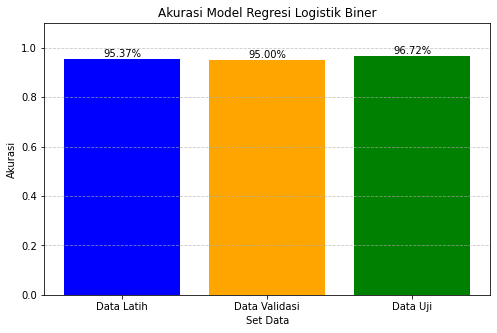

In [47]:
# Daftar nama set data
datasets = ['Data Latih', 'Data Validasi', 'Data Uji']

# Daftar nilai akurasi
accuracies = [train_accuracy_lr, val_accuracy_lr, test_accuracy_lr]

# Buat bar plot
plt.figure(figsize=(8, 5))
plt.bar(datasets, accuracies, color=['blue', 'orange', 'green'])
plt.title('Akurasi Model Regresi Logistik Biner')
plt.xlabel('Set Data')
plt.ylabel('Akurasi')
plt.ylim(0, 1.1)  # Rentang sumbu y dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label persentase di atas setiap bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2%}', ha='center', va='bottom')

plt.show()


## Pembentukan Model Soft Voting Classifier

In [48]:
# Membuat Soft Voting Classifier
voting_clf = VotingClassifier(estimators=[('svm', svm_model), ('dt', dt_model), ('lr', lr_model)], voting='soft')


# Latih model VotingClassifier
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=35)),
                             ('dt', DecisionTreeClassifier(random_state=35)),
                             ('lr', LogisticRegression(random_state=35))],
                 voting='soft')

In [49]:
# Menggabungkan probabilitas menggunakan soft voting
combined_proba = (probabilities_svm + probabilities_dt + probabilities_lr_auto) / 3

# Prediksi akhir berdasarkan probabilitas yang dihitung
y_pred_voting = np.argmax(combined_proba, axis=1)

# Buat kolom baru 'Keterangan' berdasarkan kesesuaian prediksi dan data aktual
keterangan_voting = np.where(y_pred_voting == y_test, 'Prediksi Benar', 'Prediksi Salah')

In [50]:
y_pred_voting

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [51]:
# probabilities_voting = voting_clf.predict_proba(X_test)

# # Lakukan prediksi pada data uji
# y_pred_voting = voting_clf.predict(X_test)



### Evaluasi Soft Voting Classifier

In [52]:
df_result_voting = pd.DataFrame({
    'Probabilitas Kelas Aktif (0)': combined_proba[:, 0],
    'Probabilitas Kelas Atrisi (1)': combined_proba[:, 1],
    # 'Prediksi': y_pred_voting,
    'Prediksi Manual': y_pred_voting,
    'Data Aktual': y_test,
    'Keterangan': keterangan_voting
})

# Menambahkan judul untuk index
df_result_voting.index.name = 'No. Baris Data'

df_result_voting.head(5)

,Probabilitas Kelas Aktif (0),Probabilitas Kelas Atrisi (1),Prediksi Manual,Data Aktual,Keterangan
No. Baris Data,,,,,
233,0.006367,0.993633,1,1,Prediksi Benar
269,0.007219,0.992781,1,1,Prediksi Benar
31,0.912605,0.087395,0,0,Prediksi Benar
106,0.902577,0.097423,0,0,Prediksi Benar
220,0.090187,0.909813,1,1,Prediksi Benar


In [53]:
# Hitung jumlah prediksi benar dan salah
prediksi_benar_voting = (df_result_voting['Keterangan'] == 'Prediksi Benar').sum()
prediksi_salah_voting = (df_result_voting['Keterangan'] == 'Prediksi Salah').sum()

# Tampilkan hasil
print("Jumlah prediksi benar:", prediksi_benar_voting)
print("Jumlah prediksi salah:", prediksi_salah_voting)


Jumlah prediksi benar: 61
Jumlah prediksi salah: 0


In [54]:
# Prediksi kelas untuk data latih
y_train_pred_voting = voting_clf.predict(X_train)
train_accuracy_voting = accuracy_score(y_train, y_train_pred_voting)

# Prediksi kelas untuk data validasi
y_val_pred_voting = voting_clf.predict(X_valid)
val_accuracy_voting = accuracy_score(y_valid, y_val_pred_voting)

# Prediksi kelas untuk data uji
y_test_pred_voting = voting_clf.predict(X_test)
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)

# Cetak hasil akurasi
print("Akurasi untuk data latih:", train_accuracy_voting)
print("Akurasi untuk data validasi:", val_accuracy_voting)
print("Akurasi untuk data uji:", test_accuracy_voting)

Akurasi untuk data latih: 0.99644128113879
Akurasi untuk data validasi: 0.95
Akurasi untuk data uji: 1.0


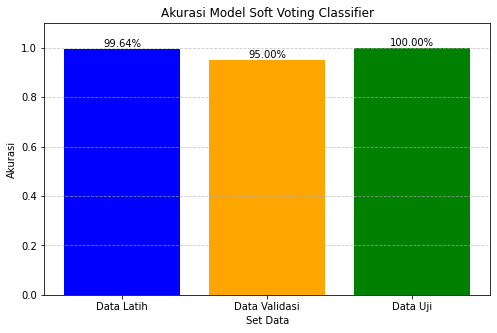

In [55]:
# Daftar nama set data
datasets = ['Data Latih', 'Data Validasi', 'Data Uji']

# Daftar nilai akurasi
accuracies = [train_accuracy_voting, val_accuracy_voting, test_accuracy_voting]

# Buat bar plot
plt.figure(figsize=(8, 5))
plt.bar(datasets, accuracies, color=['blue', 'orange', 'green'])
plt.title('Akurasi Model Soft Voting Classifier')
plt.xlabel('Set Data')
plt.ylabel('Akurasi')
plt.ylim(0, 1.1)  # Rentang sumbu y dari 0 hingga 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan label persentase di atas setiap bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2%}', ha='center', va='bottom')

plt.show()

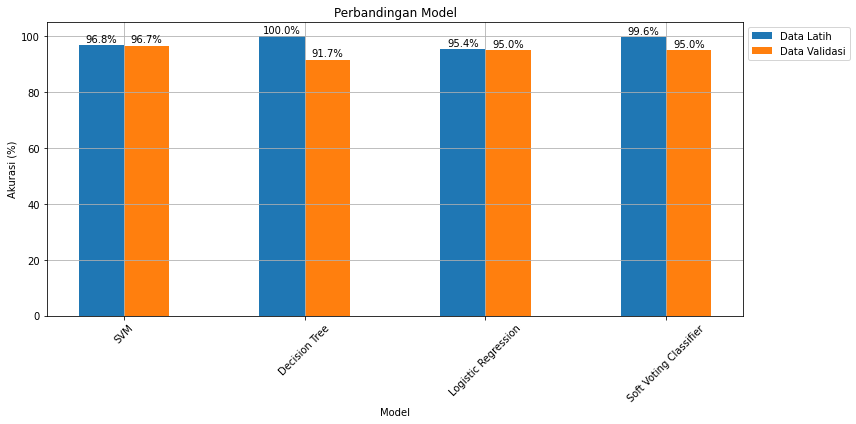

In [56]:
# Define models
models = [svm_model, dt_model, lr_model, voting_clf]

# Calculate training and testing accuracy for all models in one go
train_accuracies = [accuracy_score(y_train, model.predict(X_train)) * 100 for model in models]
test_accuracies = [accuracy_score(y_valid, model.predict(X_valid)) * 100 for model in models]

# Define model names
model_names = ['SVM', 'Decision Tree', 'Logistic Regression', 'Soft Voting Classifier']

# Plotting
bar_width = 0.25  
index = np.arange(len(models))

plt.figure(figsize=(12, 6))  # Adjust the figure size
bars1 = plt.bar(index - bar_width, train_accuracies, bar_width, label='Data Latih')
bars2 = plt.bar(index, test_accuracies, bar_width, label='Data Validasi')

# Annotate each bar with its accuracy value
for i, bar in enumerate(bars1):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, "{:.1f}%".format(yval), ha='center', va='bottom')

for i, bar in enumerate(bars2):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, "{:.1f}%".format(yval), ha='center', va='bottom')

plt.title('Perbandingan Model')
plt.xlabel('Model')
plt.ylabel('Akurasi (%)')
plt.xticks(index - bar_width/2, model_names, rotation=45) 
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()


In [57]:
# Evaluasi setiap model
for model in models:
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    
    print(f'Model: {model.__class__.__name__}')
    print('Training:')
    print(classification_report(y_train, y_train_pred))
    print('Validation:')
    print(classification_report(y_valid, y_valid_pred))
    print('------------------------------------------')


Model: SVC
Training:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       106
           1       0.99      0.95      0.97       175

    accuracy                           0.97       281
   macro avg       0.96      0.97      0.97       281
weighted avg       0.97      0.97      0.97       281

Validation:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

------------------------------------------
Model: DecisionTreeClassifier
Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       175

    accuracy                           1.00       281
   macro avg

In [58]:
# import joblib

# model = {
#     'svm_model': svm_model,
#     'dt_model': dt_model,
#     'lr_model': lr_model,
#     'voting_clf': voting_clf
# }

# # Simpan model Voting Classifier
# voting_clf_filename = 'softvoting1juni_nohp.pkl'
# joblib.dump(model, voting_clf_filename)

# Hyperparameter Tuning

In [59]:



# Tentukan grid parameter untuk Decision Tree
# dt_param_grid = {'max_depth': range(1, 20), 'min_samples_split': range(2, 20), 'min_samples_leaf': range(1, 20)}
dt_param_grid = {'max_depth': range(1, 20), 'min_samples_split': range(2, 20), 'min_samples_leaf': range(1, 20)}

# Lakukan penelusuran grid untuk Decision Tree
dt_grid = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, scoring='accuracy', cv=5)
dt_grid.fit(X_train, y_train)




# Membuat Soft Voting Classifier dengan model terbaik dari penelusuran grid
best_dt_model = dt_grid.best_estimator_

print(best_dt_model)



DecisionTreeClassifier(max_depth=2, min_samples_leaf=16, random_state=35)


In [60]:
print(best_dt_model.get_params())



print(dt_grid.best_score_)


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 16, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 35, 'splitter': 'best'}
0.9324561403508772


In [61]:
probabilities_dt_hp = dt_grid.predict_proba(X_test)

# Lakukan prediksi pada data uji
y_pred_dt_hp = dt_grid.predict(X_test)

# Pelatihan decision tree
keterangan_dt_hp = np.where(y_pred_dt_hp == y_test, 'Prediksi Benar', 'Prediksi Salah')


In [62]:
df_result_dt_hp = pd.DataFrame({
    'Probabilitas Kelas Aktif (0)': probabilities_dt_hp[:, 0],
    'Probabilitas Kelas Atrisi (1)': probabilities_dt_hp[:, 1],
    # 'Prediksi': y_pred_voting,
    'Prediksi': y_pred_dt_hp,
    'Data Aktual': y_test,
    'Keterangan': keterangan_dt_hp
})

# Menambahkan judul untuk index
df_result_dt_hp.index.name = 'No. Baris Data'

df_result_dt_hp.head(5)

,Probabilitas Kelas Aktif (0),Probabilitas Kelas Atrisi (1),Prediksi,Data Aktual,Keterangan
No. Baris Data,,,,,
233,0.056497,0.943503,1,1,Prediksi Benar
269,0.056497,0.943503,1,1,Prediksi Benar
31,0.968254,0.031746,0,0,Prediksi Benar
106,0.750000,0.250000,0,0,Prediksi Benar
220,0.056497,0.943503,1,1,Prediksi Benar


In [63]:
# Hitung jumlah prediksi benar dan salah
prediksi_benar_dt_hp = (df_result_dt_hp['Keterangan'] == 'Prediksi Benar').sum()
prediksi_salah_dt_hp = (df_result_dt_hp['Keterangan'] == 'Prediksi Salah').sum()

# Tampilkan hasil
print("Jumlah prediksi benar:", prediksi_benar_dt_hp)
print("Jumlah prediksi salah:", prediksi_salah_dt_hp)


Jumlah prediksi benar: 58
Jumlah prediksi salah: 3


## Uji Performa Model Soft Voting Classifier

In [64]:

voting_clf_hp = VotingClassifier(estimators=[('svm', svm_model), ('dt', best_dt_model), ('lr', lr_model)], voting='soft')
voting_clf_hp.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=35)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=2,
                                                     min_samples_leaf=16,
                                                     random_state=35)),
                             ('lr', LogisticRegression(random_state=35))],
                 voting='soft')

In [65]:
# Menggabungkan probabilitas menggunakan soft voting
combined_proba_hp = (probabilities_svm + probabilities_dt_hp + probabilities_lr_auto) / 3

# Prediksi akhir berdasarkan probabilitas yang dihitung
y_pred_voting_hp = np.argmax(combined_proba_hp, axis=1)

# Buat kolom baru 'Keterangan' berdasarkan kesesuaian prediksi dan data aktual
keterangan_voting_hp = np.where(y_pred_voting_hp == y_test, 'Prediksi Benar', 'Prediksi Salah')

In [66]:
df_result_voting_hp = pd.DataFrame({
    'Probabilitas Kelas Aktif (0)': combined_proba_hp[:, 0],
    'Probabilitas Kelas Atrisi (1)': combined_proba_hp[:, 1],
    # 'Prediksi': y_pred_voting,
    'Prediksi Manual': y_pred_voting_hp,
    'Data Aktual': y_test,
    'Keterangan': keterangan_voting_hp
})

# Menambahkan judul untuk index
df_result_voting_hp.index.name = 'No. Baris Data'

df_result_voting_hp.head(5)

,Probabilitas Kelas Aktif (0),Probabilitas Kelas Atrisi (1),Prediksi Manual,Data Aktual,Keterangan
No. Baris Data,,,,,
233,0.025199,0.974801,1,1,Prediksi Benar
269,0.026051,0.973949,1,1,Prediksi Benar
31,0.902023,0.097977,0,0,Prediksi Benar
106,0.819244,0.180756,0,0,Prediksi Benar
220,0.109020,0.890980,1,1,Prediksi Benar


In [67]:
# Hitung jumlah prediksi benar dan salah
prediksi_benar_voting_hp = (df_result_voting_hp['Keterangan'] == 'Prediksi Benar').sum()
prediksi_salah_voting_hp = (df_result_voting_hp['Keterangan'] == 'Prediksi Salah').sum()

# Tampilkan hasil
print("Jumlah prediksi benar:", prediksi_benar_voting_hp)
print("Jumlah prediksi salah:", prediksi_salah_voting_hp)

Jumlah prediksi benar: 60
Jumlah prediksi salah: 1


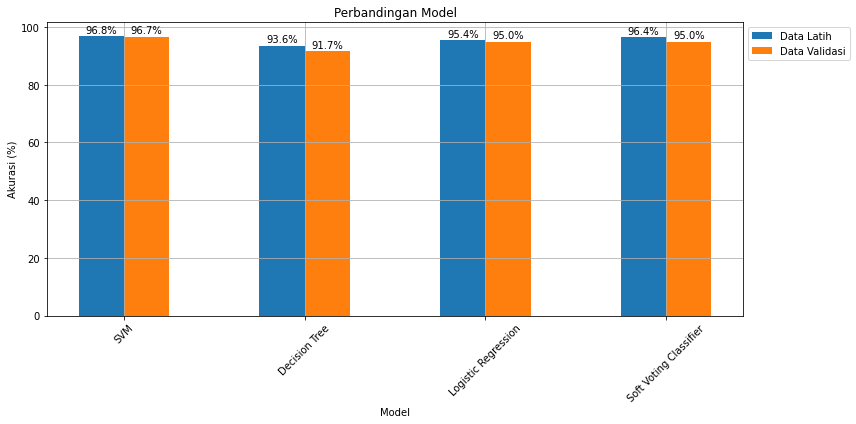

In [68]:
# Define models
models_hp = [svm_model, best_dt_model, lr_model, voting_clf_hp]

# Calculate training and testing accuracy for all models in one go
train_accuracies = [accuracy_score(y_train, model.predict(X_train)) * 100 for model in models_hp]
test_accuracies = [accuracy_score(y_valid, model.predict(X_valid)) * 100 for model in models_hp]

# Define model names
model_names = ['SVM', 'Decision Tree', 'Logistic Regression', 'Soft Voting Classifier']

# Plotting
bar_width = 0.25  
index = np.arange(len(models))

plt.figure(figsize=(12, 6))  # Adjust the figure size
bars1 = plt.bar(index - bar_width, train_accuracies, bar_width, label='Data Latih')
bars2 = plt.bar(index, test_accuracies, bar_width, label='Data Validasi')

# Annotate each bar with its accuracy value
for i, bar in enumerate(bars1):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, "{:.1f}%".format(yval), ha='center', va='bottom')

for i, bar in enumerate(bars2):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, "{:.1f}%".format(yval), ha='center', va='bottom')

plt.title('Perbandingan Model')
plt.xlabel('Model')
plt.ylabel('Akurasi (%)')
plt.xticks(index - bar_width/2, model_names, rotation=45) 
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.tight_layout()


In [69]:
# Evaluasi setiap model
for model in models_hp:
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    
    print(f'Model: {model.__class__.__name__}')
    print('Training:')
    print(classification_report(y_train, y_train_pred))
    print('Validation:')
    print(classification_report(y_valid, y_valid_pred))
    print('------------------------------------------')

Model: SVC
Training:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       106
           1       0.99      0.95      0.97       175

    accuracy                           0.97       281
   macro avg       0.96      0.97      0.97       281
weighted avg       0.97      0.97      0.97       281

Validation:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        32

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

------------------------------------------
Model: DecisionTreeClassifier
Training:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       106
           1       0.94      0.95      0.95       175

    accuracy                           0.94       281
   macro avg

In [70]:
# Evaluasi setiap model
for model in models_hp:
    # y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Model: {model.__class__.__name__}')
    # print('Training:')
    # print(classification_report(y_train, y_train_pred))
    print('Testing:')
    print(classification_report(y_test, y_test_pred))
    print('------------------------------------------')

Model: SVC
Testing:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.93      1.00      0.97        28

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61

------------------------------------------
Model: DecisionTreeClassifier
Testing:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.90      1.00      0.95        28

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.96      0.95      0.95        61

------------------------------------------
Model: LogisticRegression
Testing:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.93      1.00      0.97        28

  

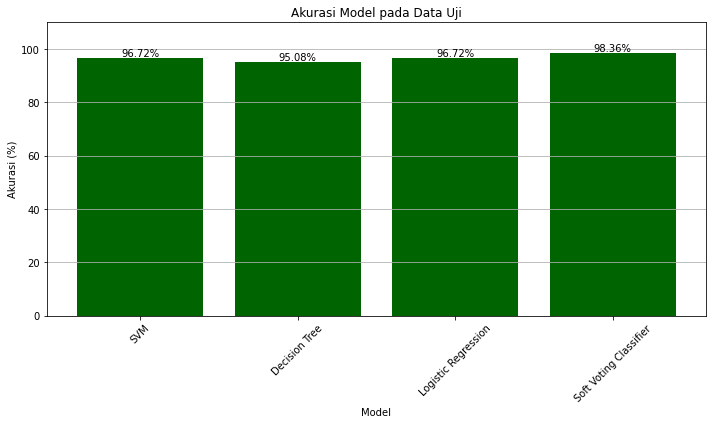

In [71]:
from sklearn.metrics import accuracy_score

# Calculate testing accuracy for all models in one go
test_accuracies = [accuracy_score(y_test, model.predict(X_test)) * 100 for model in models_hp]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, test_accuracies, color='darkgreen')
plt.title('Akurasi Model pada Data Uji')
plt.xlabel('Model')
plt.ylabel('Akurasi (%)')
plt.ylim(0, 110)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Annotate each bar with its accuracy value
for bar, accuracy in zip(bars, test_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{accuracy:.2f}%", ha='center', va='bottom', color='black')

plt.tight_layout()  # Membuat tata letak menjadi lebih rapi
plt.show()


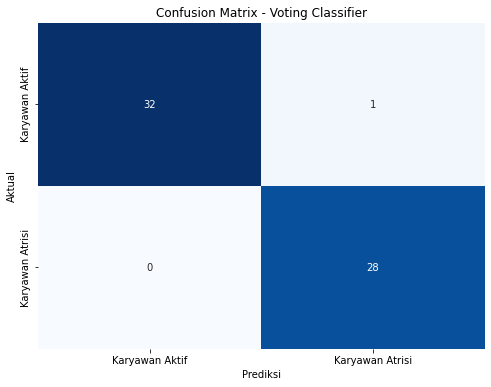

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Prediksi pada data uji menggunakan model voting classifier
# y_pred_voting = voting_clf_hp.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Karyawan Aktif', 'Karyawan Atrisi'],
            yticklabels=['Karyawan Aktif', 'Karyawan Atrisi'])
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()
